## **Introduction**

This notebook contains the steps enumerated below for analyzing characteristics of zoo animals and creating classifications.<br> 
Data is available at: https://www.kaggle.com/uciml/zoo-animal-classification/data <br><br>
Example at: https://www.kaggle.com/angeelee/zoo-animal-classification/notebook <br><br>
1. [Import Data & Python Packages](#1-bullet) <br>
2. [Assess Data Quality & Missing Values](#2-bullet)<br>
3. [Exploratory Data Analysis](#3-bullet) <br>
4. [Classification & Cross Validation](#4-bullet) <br>
    * [4.1 Split train and test dataset](#4.1-bullet) <br>
    * [4.2 Perceptron Method](#4.2-bullet)<br>
      * [4.2.1 Cross Validation for Perceptron Method](#4.2.1-bullet) <br>
    * [4.3 Decision Tree](#4.3-bullet)<br>
    * [4.4 SVM](#4.4-bullet)<br>
    * [4.5 Multiclass Logistic Regression](#4.5-bullet)<br>
5. [Summary](#5-bullet) <br>

In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import packages for data vaiualization/understanding.
import matplotlib.pyplot as plt
#With the inline command, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
%matplotlib inline 
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib. 
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

#import scikit-learn libraries for data preprocessing, model builidng & evaluation
#from sklearn import preprocessing - included in import, but not used
from sklearn.metrics import accuracy_score  #used for model evaluation - https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation

In [82]:
#Data Preparation - Import analysis datasets
#raw animal data for 100 zoo animals
animal=pd.read_csv('C:\\Python\\Data\\zoo.csv') #import to pandas DataFrame
print(animal)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
5       buffalo     1         0     0     1         0        0         0   
6          calf     1         0     0     1         0        0         0   
7          carp     0         0     1     0         0        1         0   
8       catfish     0         0     1     0         0        1         1   
9          cavy     1         0     0     1         0        0         0   
10      cheetah     1         0     0     1         0        0         1   
11      chicken     0         1     1     0         1        0         0   
12         c

In [83]:
ani_class=pd.read_csv('C:\\Python\\Data\\class.csv')
print(ani_class)

   Class_Number  Number_Of_Animal_Species_In_Class    Class_Type  \
0             1                                 41        Mammal   
1             2                                 20          Bird   
2             3                                  5       Reptile   
3             4                                 13          Fish   
4             5                                  4     Amphibian   
5             6                                  8           Bug   
6             7                                 10  Invertebrate   

                                        Animal_Names  
0  aardvark, antelope, bear, boar, buffalo, calf,...  
1  chicken, crow, dove, duck, flamingo, gull, haw...  
2    pitviper, seasnake, slowworm, tortoise, tuatara  
3  bass, carp, catfish, chub, dogfish, haddock, h...  
4                             frog, frog, newt, toad  
5  flea, gnat, honeybee, housefly, ladybird, moth...  
6  clam, crab, crayfish, lobster, octopus, scorpi...  


**1. Import Data & Python Packages **

In [84]:
animal.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [85]:
# Check class table for later use.
ani_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [86]:
#Data Understanding - Check data type for each variable
animal.info() #pandas dataframe function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


**2. Assess Data Quality & Missing Values **

In [87]:
animal.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

Good news is there's no missing value in this table! 
And data seems to be very clean that only full number is presented.

In [88]:
animal.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [89]:
# Check if class_type has correct values
print(animal.class_type.unique())

[1 4 2 7 6 5 3]


In [90]:
print(animal.legs.unique())

[4 0 2 6 8 5]


In [91]:
# just curious which animal has 5 legs
animal.loc[animal['legs'] == 5]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


**3. Exploratory Data Analysis **

In [92]:
# Join animal table and class table to show actual class names
df=pd.merge(animal,ani_class,how='left',left_on='class_type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


(array([ 41.,  20.,   5.,  13.,   4.,   8.,  10.]),
 array([ 1.        ,  1.85714286,  2.71428571,  3.57142857,  4.42857143,
         5.28571429,  6.14285714,  7.        ]),
 <a list of 7 Patch objects>)

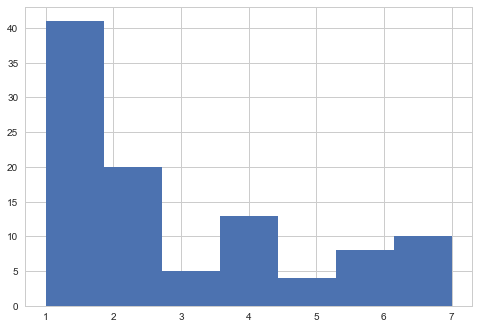

In [93]:
plt.hist(df.class_type, bins=7)  #matplot histogram

In [ ]:
# See which class the most zoo animals belong to
sns.factorplot('Class_Type', data=df,kind="count", aspect=2)

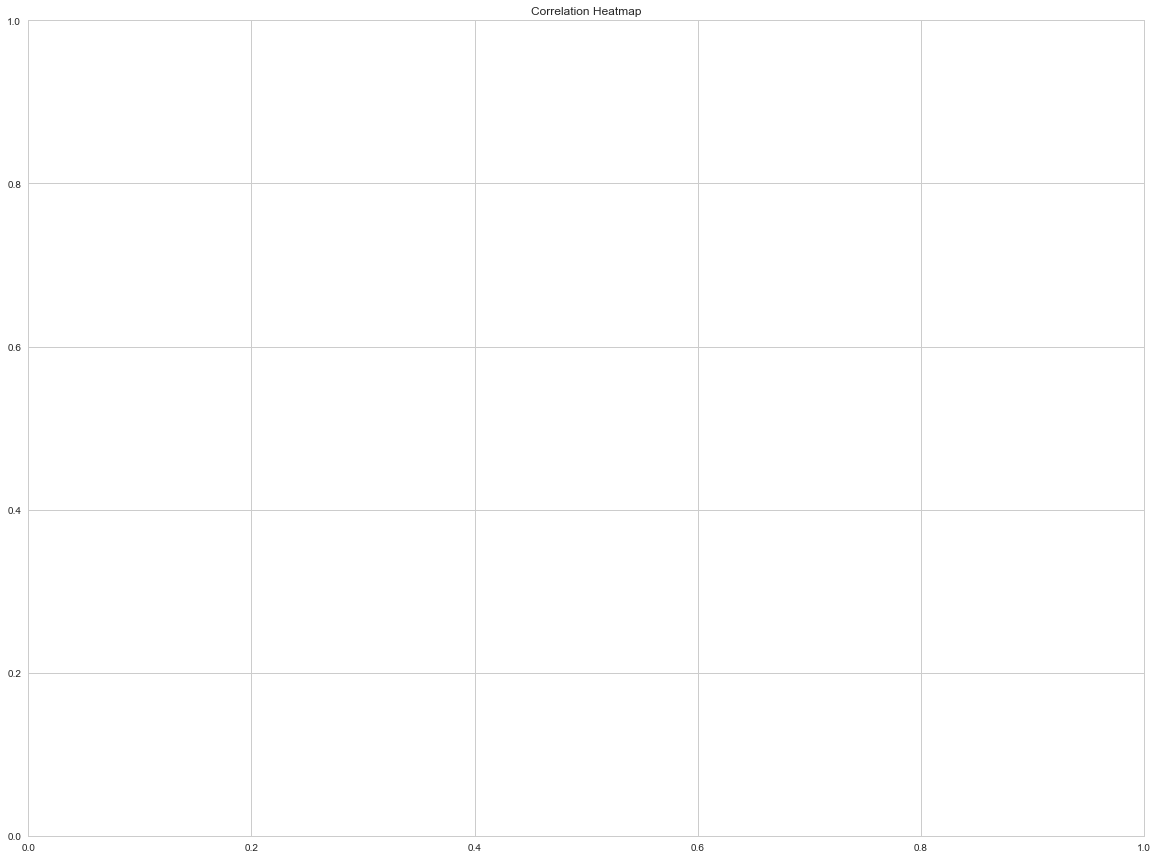

In [94]:
# heatmap to show correlations
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = animal.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [95]:
# show vairable correlation which is more than 0.7 (positive or negative)
corr[corr != 1][abs(corr)> 0.7].dropna(how='all', axis=1).dropna(how='all', axis=0)

,hair,eggs,milk,backbone,tail,class_type
hair,NaN,-0.817382,0.878503,NaN,NaN,NaN
eggs,-0.817382,NaN,-0.938848,NaN,NaN,NaN
milk,0.878503,-0.938848,NaN,NaN,NaN,-0.723683
backbone,NaN,NaN,NaN,NaN,0.731762,-0.828845
tail,NaN,NaN,NaN,0.731762,NaN,NaN
class_type,NaN,NaN,-0.723683,-0.828845,NaN,NaN


In [96]:
df.groupby('Class_Type').mean()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class
Class_Type,,,,,,,,,,,,,,,,,,,
Amphibian,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000,5.0,5.0,4.0
Bird,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000,2.0,2.0,20.0
Bug,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000,6.0,6.0,8.0
Fish,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692,4.0,4.0,13.0
Invertebrate,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000,7.0,7.0,10.0
Mammal,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488,1.0,1.0,41.0
Reptile,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000,3.0,3.0,5.0


It is too obvious that if "milk" exists, then the animal is mammal; if "feathers" exists, then it should be bird. 

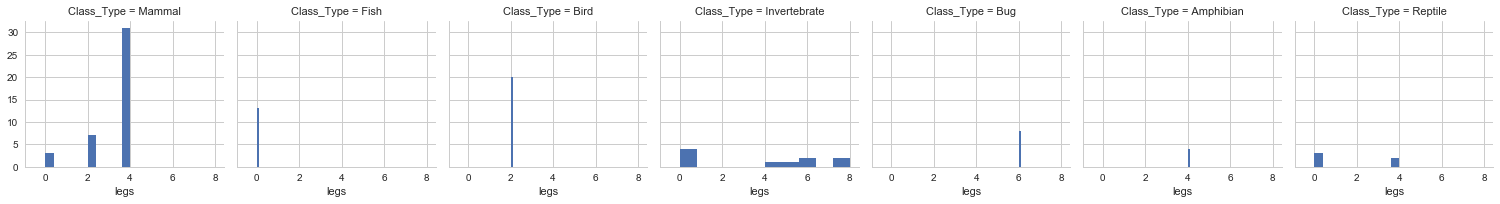

In [97]:
# checking leg number in each class
g = sns.FacetGrid(df, col="Class_Type")
g.map(plt.hist, "legs")
plt.show()

**4. Classification & Cross Validation **

**4.1 Split train and test dataset **

In [98]:
from sklearn.model_selection import train_test_split
#get predictor varialbes - columns 1-17 in merged dataset
X = animal.iloc[:,1:17]
#get target variable - "class type"
y = animal.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)#80/20 train test split

**4.2 Perceptron Method - In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers:
**<br>Perceptron is good for multi-class classification, which might be a good method for us, since we have 7 animal classes.

In [99]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train) #build model using training data
# make prediction
y_pred = ppn.predict(X_test)
# check model accuracy
accuracy_score(y_pred,y_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.90476190476190477

In [100]:
# re-run and test perceptron classification model using 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.967741935483871

By spliting train/test dataset again did make the model to fit better. But I would do a cross validation for this model.

**4.2.1 Cross Validation for Perceptron Method**<br>
K-fold CV - we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test.<br>
* A model is trained using k-1 of the folds as training data<br>
* the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

In [101]:
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.90909091,  0.85714286,  0.9047619 ,  0.89473684,  0.88888889])

In [102]:
# The mean score and the 95% confidence interval of the score estimate are:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_ppn.mean(), score_ppn.std() * 2))

Accuracy: 0.89 (+/- 0.04)


So the accuracy for Perceptron model is around 0.89, which is fine, but I'd like to try some other models.

**4.3 Decision Tree**

In [103]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
score_dt=cross_val_score(dt, X,y, cv=5)
score_dt

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 1.        ,  0.85714286,  0.9047619 ,  1.        ,  0.94444444])

In [104]:
# The mean score and the 95% confidence interval of the score estimate are:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_dt.mean(), score_dt.std() * 2))

Accuracy: 0.94 (+/- 0.11)


**4.4 SVM**

In [105]:
#Multiclass SVM aims to assign labels to instances by using support-vector machines, where the labels are 
#drawn from a finite set of several elements. #The dominant approach for doing so is to reduce the 
#single multiclass SVM problem into multiple binary classification problems
from sklearn.svm import SVC #Support Vector Classification - multiple groups
svc = SVC(kernel='linear', C=1) #linear classification
score_svc=cross_val_score(svc, X,y, cv=5)
score_svc

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 1.        ,  0.95238095,  0.9047619 ,  1.        ,  0.94444444])

In [106]:
# The mean score and the 95% confidence interval of the score estimate are:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_svc.mean(), score_svc.std() * 2))

Accuracy: 0.96 (+/- 0.07)


**4.5 Multiclass Logistic Regression**

In [107]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
score_lr=cross_val_score(lr, X,y, cv=5)
score_lr

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 1.        ,  0.95238095,  0.9047619 ,  0.94736842,  0.94444444])

In [108]:
# The mean score and the 95% confidence interval of the score estimate are:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_lr.mean(), score_lr.std() * 2))

Accuracy: 0.95 (+/- 0.06)


**5. Summary**

In [109]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 'Perceptron', 'Decision Tree'],
    'Score': [score_svc.mean(), score_lr.mean(), score_ppn.mean(), score_dt.mean()]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.960317
1,Logistic Regression,0.949791
3,Decision Tree,0.941270
2,Perceptron,0.890924


After comparing the score of each model, the SVM model seems to be the most accurate.